# Exercise 3.1

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from datetime import datetime

%matplotlib inline

In [2]:
os.chdir('/Users/Sam/ds/metis/metisgh/sf16_ds4/challenges/03-linear_splitting/')

In [3]:
df = pd.read_csv('2013_movies.csv')

In [4]:
df['ones'] = df['Runtime']*0 + 1
df['ones'].unique()

array([1])

In [5]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1


In [6]:
X = df['ones']
y = df['DomesticTotalGross']

In [7]:
model1 = sm.OLS(y,X)
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sun, 09 Oct 2016   Prob (F-statistic):                nan
Time:                        21:38:06   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ones        1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using only a column of ones to try and predict a continuous target results in a straight line at the point of the intercept. It basically predicts that every movie will have the same gross domestic target, which is at the intercept.

In [8]:
y_predict1 = fit1.predict(X)

(0, 300000000)

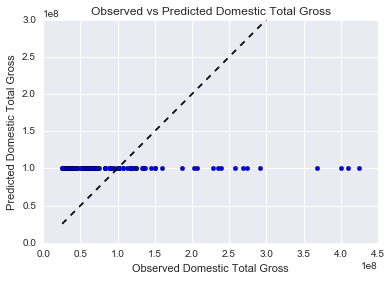

In [9]:
plt.scatter(y, y_predict1)
plt.title('Observed vs Predicted Domestic Total Gross')
plt.xlabel('Observed Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.plot(y, y, 'k--')
plt.ylim(0, 300000000)

(array([ 47.,  21.,  15.,   3.,   3.,   4.,   3.,   0.,   1.,   3.]),
 array([ -7.50286242e+07,  -3.51186446e+07,   4.79133498e+06,
          4.47013146e+07,   8.46112942e+07,   1.24521274e+08,
          1.64431253e+08,   2.04341233e+08,   2.44251213e+08,
          2.84161192e+08,   3.24071172e+08]),
 <a list of 10 Patch objects>)

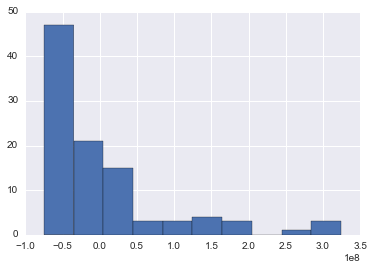

In [10]:
resid1 = y - y_predict1
plt.hist(resid1)

The residuals are right skewed. Since we are plotting actual minus predicted, this means that we are underestimating at lower values and overestimating at larger values.

# Exercise 3.2

In [11]:
df2 = df.dropna()

In [12]:
X = df2.drop(['Title', 'DomesticTotalGross', 'Director', 'Rating', 'Runtime', 'ReleaseDate'], axis = 1)
y = df2['DomesticTotalGross']


In [13]:
model2 = sm.OLS(y, X)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           1.19e-07
Time:                        21:38:09   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         0.7831      0.135      5.782      0.000         0.514     1.052
ones        4.443e+07    1.3e+07      3.418      0.001      1.86e+07  7.03e+07
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

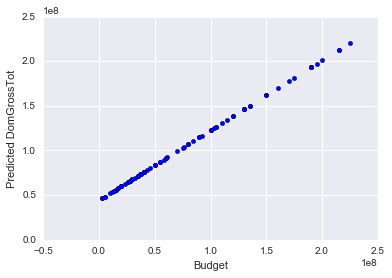

In [14]:
y_predict2 = fit2.predict(X)
plt.scatter(df2['Budget'], y_predict2)
plt.xlabel('Budget')
plt.ylabel('Predicted DomGrossTot')

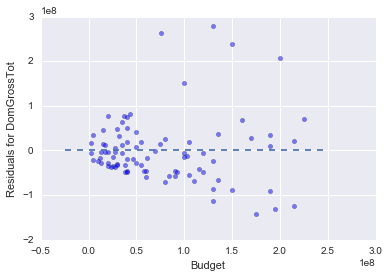

In [15]:
resid2 = y - y_predict2
lin = np.linspace(-25000000,250000000)
plt.scatter(df2['Budget'], resid2, alpha = 0.5)
plt.xlabel('Budget')
plt.ylabel('Residuals for DomGrossTot')
plt.plot(lin, lin*0, '--' )

From looking at the feature vs the residual plot, it appears that the residuals increase as the Budget feature gets larger. This means that there is heteroskedasticity because the residuals are not normally distirbuted.

# Exercise 3.3

In [16]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1


In [17]:
df['RatingG'] = (df['Rating'].apply(lambda x: x == 'G')).astype(int)
df['RatingPG'] = (df['Rating'].apply(lambda x: x == 'PG')).astype(int)
df['RatingPG13'] = (df['Rating'].apply(lambda x: x == 'PG-13')).astype(int)
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ones,RatingG,RatingPG,RatingPG13
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1,0,0,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1,0,0,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1,0,1,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1,0,1,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1,0,0,1


In [18]:
df3 = df.dropna()

In [19]:
X = df3.drop(['Title','DomesticTotalGross', 'Director', 'Rating', 'Runtime', 'ReleaseDate'], axis = 1)
y = df3['DomesticTotalGross']


In [20]:
model3 = sm.OLS(y,X)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           3.25e-06
Time:                        21:38:15   Log-Likelihood:                -1699.7
No. Observations:                  87   AIC:                             3407.
Df Residuals:                      83   BIC:                             3417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         0.7806      0.156      5.005      0.000         0.470     1.091
ones        4.389e+07   1.45e+07      3.029      0.003      1.51e+07  7.27e+07
RatingG    -3.707e-08   2.35e-08     -1.580      0.118     -8.37e-08   9.6e-09
RatingPG    1.384e+07   2.57e+07      0.539      0.591     -3.72e+07  6.49e+07
RatingPG13 -3.268e+06   2.01e+07     -0.163      0.871     -4.32e+07  3.67e+07
==============================================================================
Omnibus:                       36.518   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.882
Skew:                           1.529   Prob(JB):                     1.66e-18
Kurtosis:                       6.638   Cond. No.                     6.12e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
y_predict3 = fit3.predict(X)

(0, 300000000)

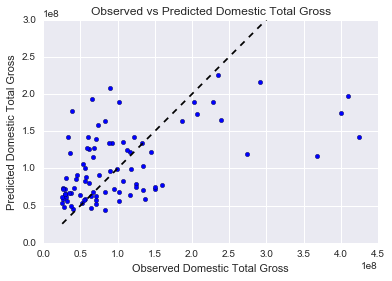

In [22]:
plt.scatter(y, y_predict3)
plt.title('Observed vs Predicted Domestic Total Gross')
plt.xlabel('Observed Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.plot(y, y, 'k--')
plt.ylim(0, 300000000)

(array([  4.,  10.,  28.,  24.,  10.,   6.,   1.,   0.,   2.,   2.]),
 array([ -1.38865140e+08,  -9.67218961e+07,  -5.45786526e+07,
         -1.24354092e+07,   2.97078343e+07,   7.18510777e+07,
          1.13994321e+08,   1.56137565e+08,   1.98280808e+08,
          2.40424052e+08,   2.82567295e+08]),
 <a list of 10 Patch objects>)

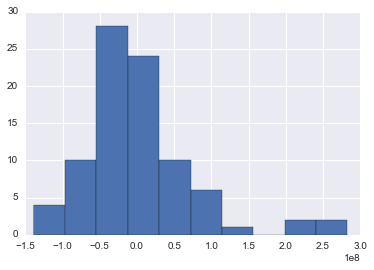

In [23]:
resid3 = y - y_predict3
plt.hist(resid3)

The model is much better at predicting than in Challenge 1. When looking at the residual plot, the residuals look much more normally distributed. When examining the R squared and the observed vs prediction plot, the model has much more predictive power.

# Exercise 3.4

In [24]:
df3.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ones,RatingG,RatingPG,RatingPG13
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1,0,0,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1,0,0,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1,0,1,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1,0,1,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1,0,0,1


In [35]:
X = df3.drop(['Title','DomesticTotalGross', 'Director', 'Rating', 'ReleaseDate'], axis = 1)
y = df3['DomesticTotalGross']


In [39]:
model4 = sm.OLS(y,X)
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8.730
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           6.38e-06
Time:                        21:46:29   Log-Likelihood:                -1699.0
No. Observations:                  87   AIC:                             3408.
Df Residuals:                      82   BIC:                             3420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         0.6957      0.172      4.054      0.000         0.354     1.037
Runtime     6.254e+05   5.33e+05      1.173      0.244     -4.35e+05  1.69e+06
ones       -2.281e+07   5.87e+07     -0.389      0.698      -1.4e+08  9.39e+07
RatingG     3.861e-09   1.41e-08      0.274      0.785     -2.42e-08  3.19e-08
RatingPG     2.59e+07   2.76e+07      0.939      0.351      -2.9e+07  8.08e+07
RatingPG13 -1.563e+06   2.01e+07     -0.078      0.938     -4.15e+07  3.84e+07
==============================================================================
Omnibus:                       35.472   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.021
Skew:                           1.509   Prob(JB):                     3.11e-17
Kurtosis:                       6.445   Cond. No.                     3.35e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.15e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
y_predict4 = fit4.predict(X)

(0, 300000000)

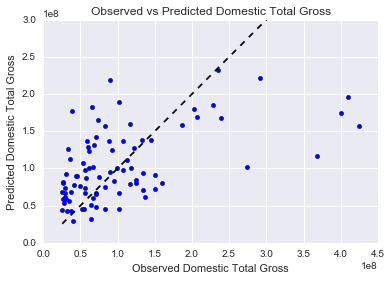

In [41]:
plt.scatter(y, y_predict4)
plt.title('Observed vs Predicted Domestic Total Gross')
plt.xlabel('Observed Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.plot(y, y, 'k--')
plt.ylim(0, 300000000)

# Exercise 3.5

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [43]:
model5 = sm.OLS(y_train, X_train)
fit5 = model5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     7.278
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           7.58e-05
Time:                        21:48:39   Log-Likelihood:                -1268.3
No. Observations:                  65   AIC:                             2547.
Df Residuals:                      60   BIC:                             2558.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         0.7717      0.193      4.003      0.000         0.386     1.157
Runtime     -5.07e+04    6.2e+05     -0.082      0.935     -1.29e+06  1.19e+06
ones        4.678e+07   6.91e+07      0.677      0.501     -9.15e+07  1.85e+08
RatingG     1.399e-08   1.66e-08      0.844      0.402     -1.92e-08  4.72e-08
RatingPG    2.655e+07   3.13e+07      0.849      0.399      -3.6e+07  8.91e+07
RatingPG13 -2.453e+06   2.36e+07     -0.104      0.917     -4.96e+07  4.47e+07
==============================================================================
Omnibus:                       22.567   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.980
Skew:                           1.286   Prob(JB):                     2.54e-08
Kurtosis:                       5.509   Cond. No.                     2.00e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
y_predict5 = fit4.predict(X_test)

(0, 300000000)

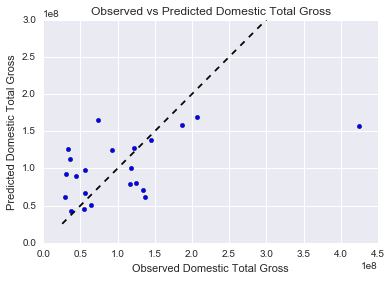

In [46]:
plt.scatter(y_test, y_predict5)
plt.title('Observed vs Predicted Domestic Total Gross')
plt.xlabel('Observed Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.plot(y, y, 'k--')
plt.ylim(0, 300000000)